<a href="https://colab.research.google.com/github/oumab26/Symfony4_TP3/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ztest
from scipy import stats

# Read the data
X = pd.read_csv('/content/data.csv',encoding= 'unicode_escape')
X.head()

Job Title             Salary Estimate  \
0                 Tourism  $37K-$66K (Glassdoor est.)   
1             Alimentaire  $37K-$66K (Glassdoor est.)   
2    Data Science Manager  $37K-$66K (Glassdoor est.)   
3             Alimentaire  $37K-$66K (Glassdoor est.)   
4  Director, Data Science  $37K-$66K (Glassdoor est.)   

                      Company Name Location                    Size  \
0                      Hopper\n3.5   Ariana   501 to 1000 employees   
1                     Noom US\n4.5   Ariana  1001 to 5000 employees   
2                         Decode_M   Ariana       1 to 50 employees   
3            Sapphire Digital\n3.4   Ariana    201 to 500 employees   
4  United Entertainment Group\n3.4   Ariana     51 to 200 employees   

  Date  job offer             Sector  Like  Dislike  Satisfaction/Rating %  \
0      01/01/2023   Travel & Tourism  1550       59                  94.46   
1      01/01/2023        Alimentaire  1750      178                  93.94   
2      01/01/2023       informatique  1789      158                  92.46   
3      01/01/2023        Alimentaire  1500      250                  91.84   
4      01/01/2023  Business Services   178       25                  89.96   

   Etat travail  
0             1  
1             0  
2             1  
3             1  
4             1

In [58]:
X.shape

(3909, 11)

In [59]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              3909 non-null   object 
 1   Salary Estimate        3909 non-null   object 
 2   Company Name           3909 non-null   object 
 3   Location               3909 non-null   object 
 4   Size                   3909 non-null   object 
 5   Date  job offer        3909 non-null   object 
 6   Sector                 3909 non-null   object 
 7   Like                   3909 non-null   int64  
 8   Dislike                3909 non-null   int64  
 9   Satisfaction/Rating %  3909 non-null   float64
 10  Etat travail           3909 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 336.1+ KB


In [60]:
(X == '-1').sum()

Job Title                0
Salary Estimate          0
Company Name             0
Location                 0
Size                     0
Date  job offer          0
Sector                   0
Like                     0
Dislike                  0
Satisfaction/Rating %    0
Etat travail             0
dtype: int64

In [ ]:
data=X.replace(-1,np.nan)
data=X.replace(-1.0,np.nan)
data=X.replace('-1',np.nan)

In [61]:
X.duplicated().sum() 

0

In [62]:
X['Job Title'].value_counts().head(20)

Agriculture                      592
Data Scientist                   237
Data Analyst                     219
Data Engineer                    216
Senior Data Scientist             82
textile                           70
Machine Learning Engineer         43
Senior Data Analyst               42
Business Intelligence Analyst     32
Big Data Engineer                 30
Senior Data Engineer              28
Sr. Data Scientist                21
Lead Data Scientist               19
Research Scientist                19
agriculture                       18
Data Modeler                      17
Principal Data Scientist          14
ingnierie                         14
informatique                      14
Junior Data Analyst               13
Name: Job Title, dtype: int64

In [ ]:
X['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)     114
$42K-$76K (Glassdoor est.)     107
$58K-$93K (Glassdoor est.)      62
$43K-$76K (Glassdoor est.)      62
$60K-$124K (Glassdoor est.)     62
                              ... 
$32K-$56K (Glassdoor est.)       4
$43K-$77K (Glassdoor est.)       3
$36K-$67K (Glassdoor est.)       3
$57K-$70K (Glassdoor est.)       2
Salary Estimate                  1
Name: Salary Estimate, Length: 90, dtype: int64

In [ ]:
result = type(X['Salary Estimate'])
print(result)


<class 'pandas.core.series.Series'>


In [ ]:
X["Salary Estimate"]

0       $37K-$66K (Glassdoor est.)
1       $37K-$66K (Glassdoor est.)
2       $37K-$66K (Glassdoor est.)
3       $37K-$66K (Glassdoor est.)
4       $37K-$66K (Glassdoor est.)
                   ...            
3904    $42K-$76K (Glassdoor est.)
3905    $42K-$76K (Glassdoor est.)
3906    $42K-$76K (Glassdoor est.)
3907    $42K-$76K (Glassdoor est.)
3908    $42K-$76K (Glassdoor est.)
Name: Salary Estimate, Length: 3909, dtype: object

In [63]:
X['Company Name'] = X['Company Name'].str.split('\n').str[0]

In [64]:
X[['Salary_min','Salary_max']] = X['Salary Estimate'].str.split("-",expand=True)

In [66]:
X.Salary_min = X.Salary_min.str.extract('(\d+)').astype('float')*1000
X.Salary_max = X.Salary_max.str.extract('(\d+)').astype('float')*1000
X['Salary_avg'] = (X.Salary_max+X.Salary_min)/2

In [67]:
X.head()


Job Title             Salary Estimate  \
0                 Tourism  $37K-$66K (Glassdoor est.)   
1             Alimentaire  $37K-$66K (Glassdoor est.)   
2    Data Science Manager  $37K-$66K (Glassdoor est.)   
3             Alimentaire  $37K-$66K (Glassdoor est.)   
4  Director, Data Science  $37K-$66K (Glassdoor est.)   

                 Company Name Location                    Size  \
0                      Hopper   Ariana   501 to 1000 employees   
1                     Noom US   Ariana  1001 to 5000 employees   
2                    Decode_M   Ariana       1 to 50 employees   
3            Sapphire Digital   Ariana    201 to 500 employees   
4  United Entertainment Group   Ariana     51 to 200 employees   

  Date  job offer             Sector  Like  Dislike  Satisfaction/Rating %  \
0      01/01/2023   Travel & Tourism  1550       59                  94.46   
1      01/01/2023        Alimentaire  1750      178                  93.94   
2      01/01/2023       informatique  1789      158                  92.46   
3      01/01/2023        Alimentaire  1500      250                  91.84   
4      01/01/2023  Business Services   178       25                  89.96   

   Etat travail  Salary_min  Salary_max  Salary_avg  
0             1         inf         inf         inf  
1             0         inf         inf         inf  
2             1         inf         inf         inf  
3             1         inf         inf         inf  
4             1         inf         inf         inf

Text(0.5, 1.0, 'Companies with most job offers')

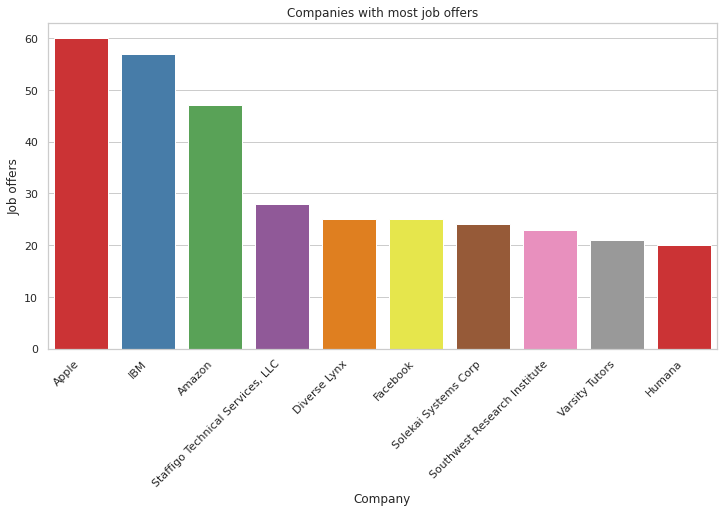

In [68]:
df_comp = X.groupby(['Company Name']).count()[['Job Title']]
df_comp = df_comp.sort_values('Job Title', ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_comp.index, y=df_comp["Job Title"],palette='Set1')
ax.set(xlabel='Company', ylabel='Job offers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('Companies with most job offers')

Text(0.5, 1.0, 'Job offers in different cities')

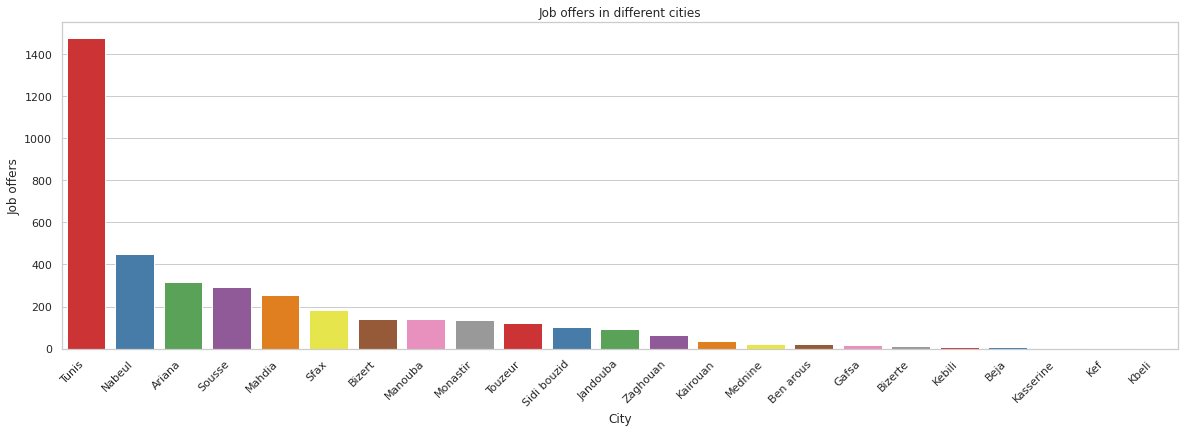

In [69]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Location', data= X, order = X['Location'].value_counts().index[:25] ,palette='Set1')
ax.set(xlabel='City', ylabel='Job offers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('Job offers in different cities')

Text(0.5, 1.0, 'Avarage salary in the companies')

<Figure size 432x288 with 0 Axes>

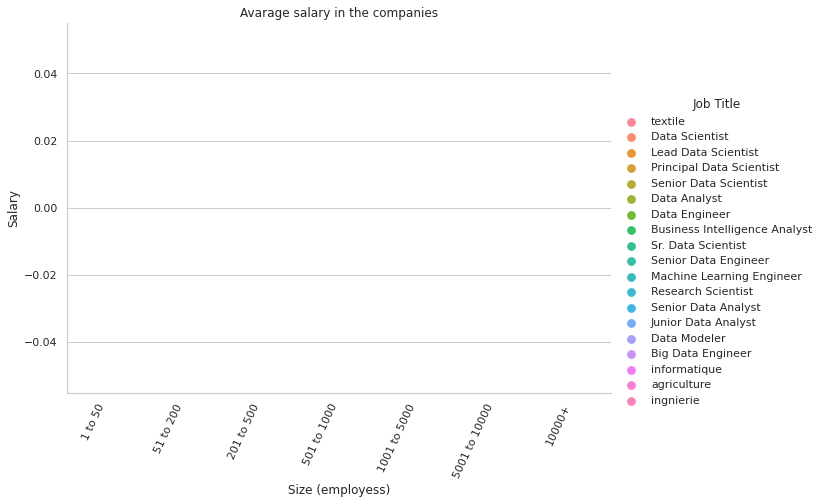

In [70]:
X_1 = X[X['Job Title'].isin(['Agriculture    ',              
'Data Scientist',               
'Data Analyst',                  
'Data Engineer',        
'Senior Data Scientist',          
'textile',
'Machine Learning Engineer',
'Senior Data Analyst',
'Business Intelligence Analyst',
'Big Data Engineer',
'Senior Data Engineer',
'Sr. Data Scientist',
'Lead Data Scientist',  
'Research Scientist',    
'agriculture',      
'Data Modeler',        
'Principal Data Scientist',          
'ingnierie',            
'informatique',              
'Junior Data Analyst' ])]
plt.figure()
sns.set(style="whitegrid")
chart = sns.catplot(x="Size", y="Salary_avg", hue="Job Title", order= ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees','501 to 1000 employees', '1001 to 5000 employees',
       '5001 to 10000 employees', '10000+ employees'], kind="swarm", data=X_1[(X_1['Size'].notnull()) & (X_1['Size']!= 'Unknown')],
        height=6, aspect = 1.5);
chart.set(xlabel='Size (employess)', ylabel='Salary')
for axes in chart.axes.flat:
    axes.set_xticklabels(['1 to 50', '51 to 200', '201 to 500','501 to 1000', '1001 to 5000',
       '5001 to 10000', '10000+'], rotation=65, horizontalalignment='right')
plt.title('Avarage salary in the companies')

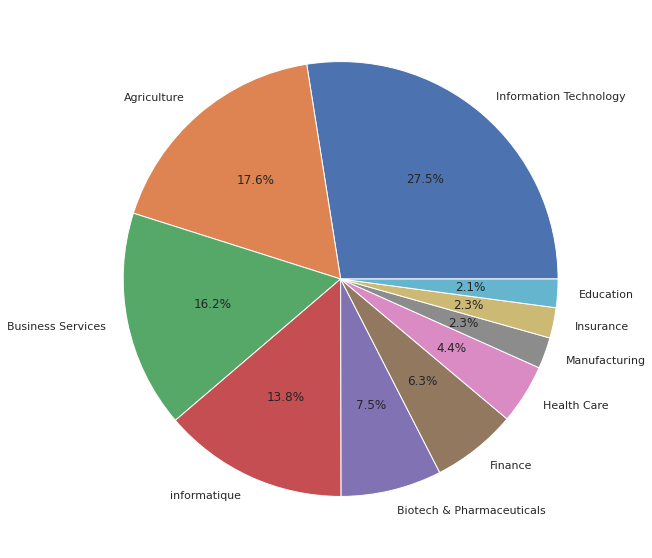

In [71]:

df_sectors = X.Sector.value_counts().sort_values(ascending=False).head(n=10)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
df_sectors.plot.pie(autopct='%1.1f%%', ylabel="");

In [72]:
length = len(X)

train_len = int(0.8 * length)
print(train_len)
test_len = int(0.2 * length)
print(test_len)

3127
781


In [73]:
x = X[0: train_len]

print(x)

                                              Job Title  \
0                                               Tourism   
1                                           Alimentaire   
2                                  Data Science Manager   
3                                           Alimentaire   
4                                Director, Data Science   
...                                                 ...   
3122                                   Sr. Data Analyst   
3123  Return to Work - Research Data Scientist, Infr...   
3124  Quantum Principal Data Scientist- Industrial P...   
3125              UX Quantitative Researcher, Instagram   
3126                              Business Data Analyst   

                 Salary Estimate                Company Name Location  \
0     $37K-$66K (Glassdoor est.)                      Hopper   Ariana   
1     $37K-$66K (Glassdoor est.)                     Noom US   Ariana   
2     $37K-$66K (Glassdoor est.)                    Decode_M   Ariana   

In [74]:
y = X[train_len: train_len+test_len]
print(y)

                                              Job Title  \
3127  Data Scientist, PhD University Graduate, 2020 ...   
3128                               Scientist 2, Biology   
3129                                       Data Analyst   
3130                 Data Scientist, Auction & Delivery   
3131                                       Data Analyst   
...                                                 ...   
3903                                        Agriculture   
3904                                        Agriculture   
3905                                        Agriculture   
3906                                        Agriculture   
3907                                        Agriculture   

                 Salary Estimate                      Company Name Location  \
3127  $68K-$87K (Glassdoor est.)                            Google     Sfax   
3128  $68K-$87K (Glassdoor est.)       Axelon Services Corporation     Sfax   
3129  $68K-$87K (Glassdoor est.)                      

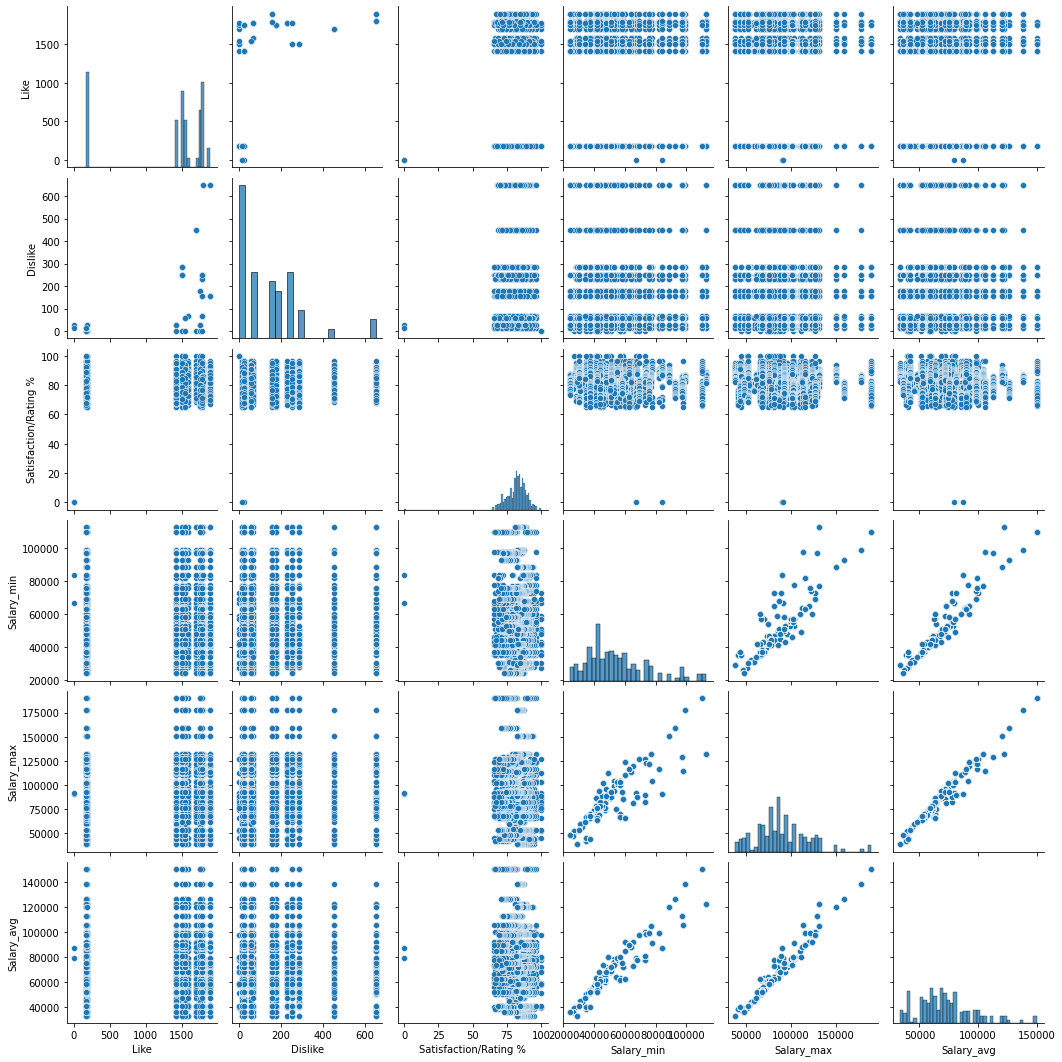

In [14]:
#Exploratory data analysis
sns.pairplot(X)

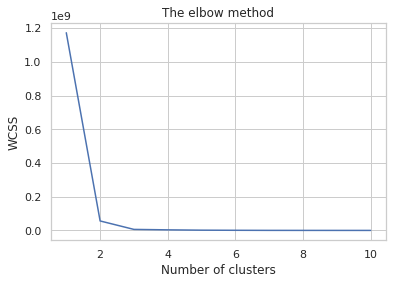

In [75]:
#Finding the optimum number of clusters for k-means classification
xx=x.iloc[:,[7]].values
yy= x.iloc[:,0].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(xx)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [12]:
print(kmeans)

KMeans(n_clusters=10, random_state=0)


In [22]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(xx)

In [23]:
print(y_kmeans)
y_kmeans

[5 6 2 ... 6 2 3]


array([5, 6, 2, ..., 6, 2, 3], dtype=int32)

In [20]:
kmeans.inertia_

56157606.71918783

In [21]:
kmeans.n_iter_

2

In [24]:
kmeans.cluster_centers_

array([[1420.        ],
       [ 176.5       ],
       [1787.23411371],
       [1500.        ],
       [1895.        ],
       [1550.        ],
       [1750.33      ],
       [1700.        ],
       [1582.        ],
       [   0.        ]])

In [153]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx, yy,test_size=0.2, random_state=3)


In [29]:
print(X_train)

[[1582]
 [ 178]
 [1789]
 ...
 [1750]
 [1500]
 [1750]]


In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2345, 1) (782, 1) (2345,) (782,)


In [31]:
# train-test split evaluation random forest on the sonar dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [32]:
# make predictions
yhat = model.predict(X_test)

In [33]:
# evaluate predictions
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.063


Job Title             Salary Estimate  \
0                 Tourism  $37K-$66K (Glassdoor est.)   
1             Alimentaire  $37K-$66K (Glassdoor est.)   
2    Data Science Manager  $37K-$66K (Glassdoor est.)   
3             Alimentaire  $37K-$66K (Glassdoor est.)   
4  Director, Data Science  $37K-$66K (Glassdoor est.)   

                 Company Name Location                    Size  \
0                      Hopper   Ariana   501 to 1000 employees   
1                     Noom US   Ariana  1001 to 5000 employees   
2                    Decode_M   Ariana       1 to 50 employees   
3            Sapphire Digital   Ariana    201 to 500 employees   
4  United Entertainment Group   Ariana     51 to 200 employees   

  Date  job offer             Sector  Like  Dislike  Satisfaction/Rating %  \
0      01/01/2023   Travel & Tourism  1550       59                  94.46   
1      01/01/2023        Alimentaire  1750      178                  93.94   
2      01/01/2023       informatique  1789      158                  92.46   
3      01/01/2023        Alimentaire  1500      250                  91.84   
4      01/01/2023  Business Services   178       25                  89.96   

   Salary_min  Salary_max  Salary_avg          PC1         PC2  
0     37000.0     66000.0     51500.0  -212.113343 -116.194016  
1     37000.0     66000.0     51500.0  -425.748624  -23.884935  
2     37000.0     66000.0     51500.0  -461.854789  -48.731361  
3     37000.0     66000.0     51500.0  -187.075356   79.648011  
4     37000.0     66000.0     51500.0  1152.878199   26.417661

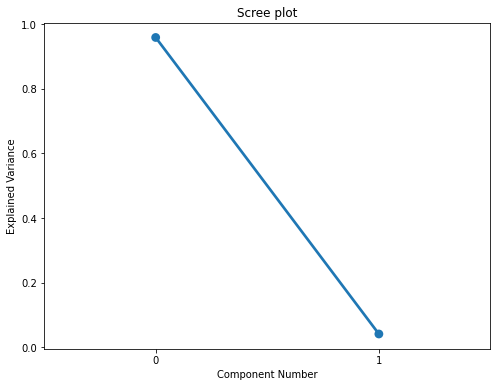

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0

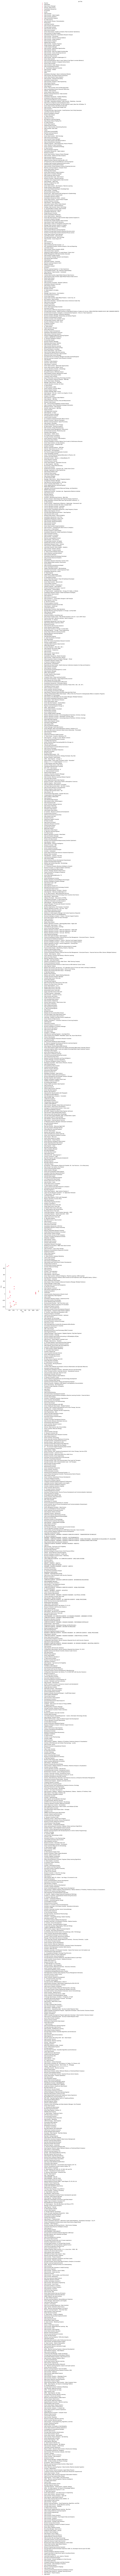

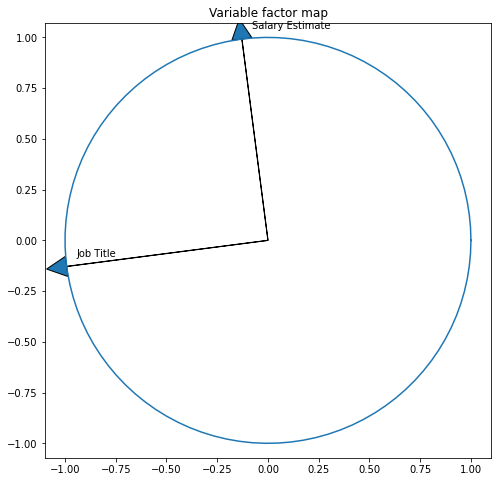

In [205]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 

 
n_components = 2
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(X[['Like', 'Dislike'
                                ]])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    X['PC' + str(i + 1)] = reduced[:, i]

display(X.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='Job Title',data=X,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             X.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [35]:
data = pd.DataFrame(np.random.randint(0, 5000, size=(3909, 2)), columns=['Like', 'Dislike'])
data

Like  Dislike
0     3730      428
1      394      574
2      415     2567
3      721      738
4       17      207
...    ...      ...
3904  1440     4955
3905  1197      917
3906  1842     1374
3907  2402      490
3908  4625     3902

[3909 rows x 2 columns]

In [36]:
data.corr()

Like   Dislike
Like     1.000000 -0.008619
Dislike -0.008619  1.000000

In [37]:
data['Like'].corr(data['Dislike'])

-0.008618577812064557

In [40]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [121]:
#les domaine les plus demander
#PCA
# Applying PCA function on training
# and testing set of X component
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA  
features = ['Like','Dislike']
x = X.loc[:,features].values
#escalar valores para que tome la matriz de correlacion
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)

 



In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principales = pca.fit_transform(x)

principalesDf = pd.DataFrame(data = principales, columns=["PC1","PC2"])

In [123]:
principalesDf.head()

PC1       PC2
0 -0.158274 -0.678752
1  0.638893 -0.343640
2  0.588794 -0.483840
3  0.692646  0.287683
4 -1.904880  0.744346

In [124]:
pca.explained_variance_ratio_

array([0.75542694, 0.24457306])

In [77]:
finalDF = principalesDf
finalDF["Etat travail"]=X["Etat travail"].values

In [125]:
finalDF.head()

PC1       PC2  Etat travail
0 -0.158274 -0.678752             1
1  0.638893 -0.343640             0
2  0.588794 -0.483840             1
3  0.692646  0.287683             1
4 -1.904880  0.744346             1

In [126]:
X['Etat travail'].head()

0    1
1    0
2    1
3    1
4    1
Name: Etat travail, dtype: int64

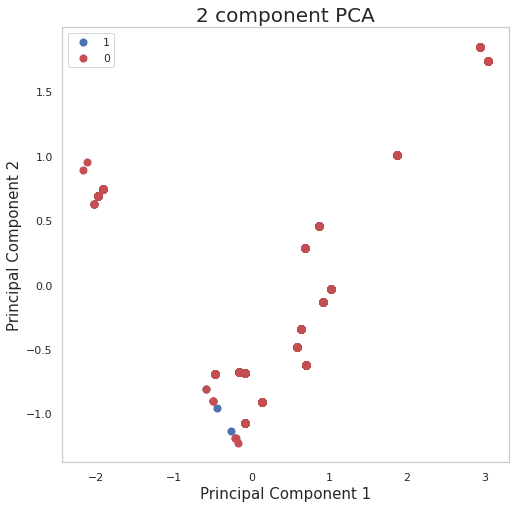

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Etat travail'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [113]:
pca.n_components

2

In [127]:
pca.explained_variance_ratio_

array([0.75542694, 0.24457306])

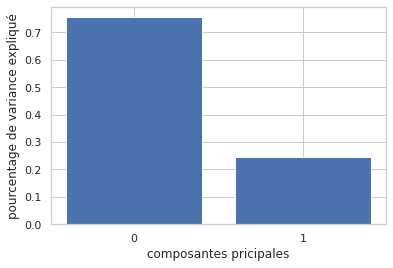

In [129]:

plt.bar(range(pca.n_components),pca.explained_variance_ratio_)
plt.xlabel('composantes pricipales')
plt.ylabel('pourcentage de variance expliqué')
plt.xticks(range(pca.n_components))
plt.show()




In [158]:
#arbre de decision
#like dislike par rapport  etat travail

from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [156]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [159]:
predTree = drugTree.predict(X_test)

In [161]:
print (predTree [0:10])
print (y_test [0:10])

['Data Scientist' 'Data Engineer' 'Data Scientist' 'Data Engineer'
 'Data Scientist' 'Data Scientist' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Engineer']
['3rd Shift Environmental Monitoring Scientist' 'Data Analyst'
 'Data Engineer' 'Operation Analytics Manager'
 'Senior Analyst, Data Science' 'Data Analyst' 'SAS Data Analyst'
 'Data Scientist II, Data, Models & Decisions'
 'Senior Data Scientist - Nationwide Opportunities' 'Sr. Data Engineer']


In [162]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.06070287539936102
